**Modules**

In [1]:
# DataFrame
import pandas as pd

# serialize and deserialize JSON
import json

# import, export, read, write compressed files
import gzip

# forced garbage collection
import gc

### Reading & Observing a Single Line or Record

**Streaming the data without unzipping the complete file into the memory**
- Reading data one line at a time

In [2]:
with gzip.open("../../Initial/goodreads_books.json.gz") as f:
    line = f.readline()

line

b'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "t

In [4]:
# json to dict

line = json.loads(line)
line

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

**List of all columns or keys**

In [6]:
list(line.keys())

['isbn',
 'text_reviews_count',
 'series',
 'country_code',
 'language_code',
 'popular_shelves',
 'asin',
 'is_ebook',
 'average_rating',
 'kindle_asin',
 'similar_books',
 'description',
 'format',
 'link',
 'authors',
 'publisher',
 'num_pages',
 'publication_day',
 'isbn13',
 'publication_month',
 'edition_information',
 'publication_year',
 'url',
 'image_url',
 'book_id',
 'ratings_count',
 'work_id',
 'title',
 'title_without_series']

**Requited columns or keys for analysis**
- Manually selected based on the application

In [10]:
req_columns = """
'isbn'
'average_rating'
'similar_books'
'description'
'link'
'authors'
'publisher'
'num_pages'
'publication_day'
'publication_month'
'publication_year'
'isbn13'
'url'
'image_url'
'book_id'
'ratings_count'
'title_without_series'
"""

### Reading the Complete Dataset Line by Line and Creating a DataFrame

**Function to parse the required attributes from the book details**
- Takes single JSON object as input

In [2]:
def parse_fields(line):
    data = json.loads(line)
    return {
        'isbn': data['isbn'],
        'average_rating': data['average_rating'],
        'similar_books': data['similar_books'],
        'description': data['description'],
        'link': data['link'],
        'authors': data['authors'],
        'publisher': data['publisher'],
        'num_pages': data['num_pages'],
        'publication_day': data['publication_day'],
        'publication_month': data['publication_month'],
        'publication_year': data['publication_year'],
        'isbn13': data['isbn13'],
        'url': data['url'],
        'image_url': data['image_url'],
        'gr_book_id': data['book_id'],
        'ratings_count': data['ratings_count'],
        'title': data['title_without_series'],
    }

**We will go through all the books from the dataset, line by line till the end using an infinite loop**
- We will parse the details of only those books which has got `>= 15` ratings or `ratings_count >= 15`  and save the book details for later use
- Runtime: 3-4 m

In [3]:
books = []

with gzip.open("../../Initial/goodreads_books.json.gz") as f:
    while True:
        # reading the line
        line = f.readline()

        # we will break the infinite loop when we reach the end of the dataset file
        if not line:
            break
        
        # parsing the line
        fields = parse_fields(line)
        
        # trying to convert ratings_count into integer
        try:
            ratings_count = int(fields["ratings_count"])
        except ValueError:
            continue

        # we will consider only those books which has more than 15 ratings
        if ratings_count > 15:
            books.append(fields)

**Total number of books**

In [4]:
len(books)

1308957

**Insight**
- There are 1,308,957 books after filtering through the criteria `ratings_count > 15`

In [14]:
books[0]

{'isbn': '',
 'average_rating': '4.03',
 'similar_books': ['19997',
  '828466',
  '1569323',
  '425389',
  '1176674',
  '262740',
  '3743837',
  '880461',
  '2292726',
  '1883810',
  '1808197',
  '625150',
  '1988046',
  '390170',
  '2620131',
  '383106',
  '1597281'],
 'description': 'Omnibus book club edition containing the Ladies of Madrigyn and the Witches of Wenshar.',
 'link': 'https://www.goodreads.com/book/show/7327624-the-unschooled-wizard',
 'authors': [{'author_id': '10333', 'role': ''}],
 'publisher': 'Nelson Doubleday, Inc.',
 'num_pages': '600',
 'publication_day': '',
 'publication_month': '',
 'publication_year': '1987',
 'isbn13': '',
 'url': 'https://www.goodreads.com/book/show/7327624-the-unschooled-wizard',
 'image_url': 'https://images.gr-assets.com/books/1304100136m/7327624.jpg',
 'gr_book_id': '7327624',
 'ratings_count': '140',
 'title': 'The Unschooled Wizard (Sun Wolf and Starhawk, #1-2)'}

**Creating a DataFrame**

In [5]:
items = pd.DataFrame.from_dict(books)

**Rows and Columns of the DataFrame**

In [6]:
print(f"Rows: {items.shape[0]}")
print(f"Columns: {items.shape[1]}")

Rows: 1308957
Columns: 17


**We don't need the `books` object anymore**
- Deleting the object from namespace and forcing Python for garbage collection (if required)
- The `del` method only removes the variable from the namespace and it does not remove the variable from the memory space
- To clear the variable from memory we can use the gc.collect() method

In [7]:
del(books)
gc.collect()

0

### Exploratory Data Analysis

**List of Columns**

In [8]:
list(items.columns)

['isbn',
 'average_rating',
 'similar_books',
 'description',
 'link',
 'authors',
 'publisher',
 'num_pages',
 'publication_day',
 'publication_month',
 'publication_year',
 'isbn13',
 'url',
 'image_url',
 'gr_book_id',
 'ratings_count',
 'title']

In [9]:
items.head()

,isbn,average_rating,similar_books,description,link,authors,publisher,num_pages,publication_day,publication_month,publication_year,isbn13,url,image_url,gr_book_id,ratings_count,title
0,,4.03,"[19997, 828466, 1569323, 425389, 1176674, 2627...",Omnibus book club edition containing the Ladie...,https://www.goodreads.com/book/show/7327624-th...,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600,,,1987,,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,0743294297,3.49,"[6604176, 6054190, 2285777, 82641, 7569453, 70...",Addie Downs and Valerie Adler were eight when ...,https://www.goodreads.com/book/show/6066819-be...,"[{'author_id': '9212', 'role': ''}]",Atria Books,368,14,7,2009,9780743294294,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,Best Friends Forever
2,1599150603,4.13,[],"Relates in vigorous prose the tale of Aeneas, ...",https://www.goodreads.com/book/show/287141.The...,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9,2006,9781599150604,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,The Aeneid for Boys and Girls
3,1934876569,4.22,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",https://www.goodreads.com/book/show/6066812-al...,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,3,2009,9781934876565,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,All's Fairy in Love and War (Avalon: Web of Ma...
4,0922915113,3.81,"[287151, 1104760, 1172822, 440292, 287082, 630...","Wisdom, humor, and dark observations by the fo...",https://www.goodreads.com/book/show/287149.The...,"[{'author_id': '2983296', 'role': ''}, {'autho...",Feral House,147,1,4,2000,9780922915118,https://www.goodreads.com/book/show/287149.The...,https://images.gr-assets.com/books/1328768789m...,287149,986,The Devil's Notebook


**Checking for null values**

In [10]:
items.isnull().sum()

isbn                 0
average_rating       0
similar_books        0
description          0
link                 0
authors              0
publisher            0
num_pages            0
publication_day      0
publication_month    0
publication_year     0
isbn13               0
url                  0
image_url            0
gr_book_id           0
ratings_count        0
title                0
dtype: int64

**Insight**
- Although we can visually see empty data but null values are not there

**Looking at datatypes of the values from individual columns of a single record**
- We will extract the data from each column from any one record and check the details

In [11]:
single_record = items.iloc[0]
single_record

isbn                                                                  
average_rating                                                    4.03
similar_books        [19997, 828466, 1569323, 425389, 1176674, 2627...
description          Omnibus book club edition containing the Ladie...
link                 https://www.goodreads.com/book/show/7327624-th...
authors                           [{'author_id': '10333', 'role': ''}]
publisher                                       Nelson Doubleday, Inc.
num_pages                                                          600
publication_day                                                       
publication_month                                                     
publication_year                                                  1987
isbn13                                                                
url                  https://www.goodreads.com/book/show/7327624-th...
image_url            https://images.gr-assets.com/books/1304100136m...
gr_boo

In [12]:
for i in single_record.index:
    print(f"Column: {i} \t - Datatype: {type(single_record[i])}")

Column: isbn 	 - Datatype: <class 'str'>
Column: average_rating 	 - Datatype: <class 'str'>
Column: similar_books 	 - Datatype: <class 'list'>
Column: description 	 - Datatype: <class 'str'>
Column: link 	 - Datatype: <class 'str'>
Column: authors 	 - Datatype: <class 'list'>
Column: publisher 	 - Datatype: <class 'str'>
Column: num_pages 	 - Datatype: <class 'str'>
Column: publication_day 	 - Datatype: <class 'str'>
Column: publication_month 	 - Datatype: <class 'str'>
Column: publication_year 	 - Datatype: <class 'str'>
Column: isbn13 	 - Datatype: <class 'str'>
Column: url 	 - Datatype: <class 'str'>
Column: image_url 	 - Datatype: <class 'str'>
Column: gr_book_id 	 - Datatype: <class 'str'>
Column: ratings_count 	 - Datatype: <class 'str'>
Column: title 	 - Datatype: <class 'str'>


**Insight**
- So, the empty data are string with `length = 0`
- Datatype of `authors` and `similar_books` are of type `list`
- Rest of the data are of `string` datatype 

**Checking the datatype of the columns as a whole**

In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   isbn               1308957 non-null  object
 1   average_rating     1308957 non-null  object
 2   similar_books      1308957 non-null  object
 3   description        1308957 non-null  object
 4   link               1308957 non-null  object
 5   authors            1308957 non-null  object
 6   publisher          1308957 non-null  object
 7   num_pages          1308957 non-null  object
 8   publication_day    1308957 non-null  object
 9   publication_month  1308957 non-null  object
 10  publication_year   1308957 non-null  object
 11  isbn13             1308957 non-null  object
 12  url                1308957 non-null  object
 13  image_url          1308957 non-null  object
 14  gr_book_id         1308957 non-null  object
 15  ratings_count      1308957 non-null  object
 16  

**Insight**
- All are looking `object` because we have string values in most of the columns there apart from `authors` and `similar_books` which are of `list` type
- `average_rating` and `ratings_count` column data are of `object` datatype but they should be of numeric type for further analysis and use.
- Similarly there are other columns which we can convert into numeric
  - `["num_pages", "publication_day", "publication_month", "publication_year", "gr_book_id"]`

**Converting datatype of columns in their proper form**
- The `errors='coerce'` parameter in the `pd.to_numeric` function means that if there are any values in the specified columns that cannot be converted to numeric, those values will be set to `NaN` (Not a Number)

In [13]:
columns_to_convert = ["average_rating", "ratings_count", "num_pages", "publication_day", "publication_month", "publication_year", "gr_book_id"]

items[columns_to_convert] = items[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308957 entries, 0 to 1308956
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   isbn               1308957 non-null  object 
 1   average_rating     1308957 non-null  float64
 2   similar_books      1308957 non-null  object 
 3   description        1308957 non-null  object 
 4   link               1308957 non-null  object 
 5   authors            1308957 non-null  object 
 6   publisher          1308957 non-null  object 
 7   num_pages          937378 non-null   float64
 8   publication_day    800719 non-null   float64
 9   publication_month  870759 non-null   float64
 10  publication_year   988556 non-null   float64
 11  isbn13             1308957 non-null  object 
 12  url                1308957 non-null  object 
 13  image_url          1308957 non-null  object 
 14  gr_book_id         1308957 non-null  int64  
 15  ratings_count      1308957 non-n

**Insight**
- We can obseve that datatypes has been converted successfully

**Checking for null values again**

In [15]:
items.isnull().sum()

isbn                      0
average_rating            0
similar_books             0
description               0
link                      0
authors                   0
publisher                 0
num_pages            371579
publication_day      508238
publication_month    438198
publication_year     320401
isbn13                    0
url                       0
image_url                 0
gr_book_id                0
ratings_count             0
title                     0
dtype: int64

**Insight**
- We can observe multiple missing values as follow

```
num_pages            371579
publication_day      508238
publication_month    438198
publication_year     320401
```
- We can simply impute them with `0`

**Imputing the missing values with `0`**

In [17]:
items.fillna(0, inplace=True)

**Checking null values after imputation**

In [18]:
items.isnull().sum()

isbn                 0
average_rating       0
similar_books        0
description          0
link                 0
authors              0
publisher            0
num_pages            0
publication_day      0
publication_month    0
publication_year     0
isbn13               0
url                  0
image_url            0
gr_book_id           0
ratings_count        0
title                0
dtype: int64

**Insight**
- We can observe that all null values has been imputed with `0`
- `0` in `["num_pages", "publication_day", "publication_month", "publication_year"]` does not make sense
- So we can consider them as missing data

**Converting ISBN and ISBN13 into numeric**

In [19]:
columns_to_convert = ["isbn", "isbn13"]

items[columns_to_convert] = items[columns_to_convert].apply(pd.to_numeric, errors='coerce')

**Checking for null values again**

In [20]:
items.isnull().sum()

isbn                 562645
average_rating            0
similar_books             0
description               0
link                      0
authors                   0
publisher                 0
num_pages                 0
publication_day           0
publication_month         0
publication_year          0
isbn13               401625
url                       0
image_url                 0
gr_book_id                0
ratings_count             0
title                     0
dtype: int64

**Insight**
- We can observe some `nan` values as these were faulty or alphanumeric ISBNs
- ISBN ideally can only be numeric and of a specific length 10 or 13.
- So, we can call them `null` values and impute them with `0` as well

**Imputing the missing values with `0`**

In [21]:
items.fillna(0, inplace=True)

**Checking null values after imputation**

In [22]:
items.isnull().sum()

isbn                 0
average_rating       0
similar_books        0
description          0
link                 0
authors              0
publisher            0
num_pages            0
publication_day      0
publication_month    0
publication_year     0
isbn13               0
url                  0
image_url            0
gr_book_id           0
ratings_count        0
title                0
dtype: int64

**Insight**
- We can observe that all null values has been imputed with `0`
- `0` in `["isbn","isbn13"]` does not make sense
- So we can consider them as missing data

**We will export this version of the data**
- We have proper datatypes for the columns
- We will export the data as compressed json where each record will be a single line as a json 

In [26]:
# with gzip.open('../../Processed/SE/books_ratingcount_gt15_p0.json.gz', 'wt', encoding='utf-8') as file:
#     file.write(items.to_json(orient='records', lines=True))

**We will look for duplicate records**

In [27]:
columns_to_ignore = ['similar_books', 'authors']
columns_to_check = items.columns.difference(columns_to_ignore)

items.duplicated(subset=columns_to_check).sum()

0

**Insight**
- We can see that there are no duplicate records as whole
- We need to look more deeper into the duplicates columns wise

#### Deeper Look into Duplicates - Column Wise

**Duplicate `title`**

In [28]:
items["title"].duplicated().sum()

318555

**Insight**
- We have 318,555 duplicate titles

**Number of unique books among duplicates**

In [33]:
len(items.loc[items["title"].duplicated(),"title"].unique())

146168

**Insight**
- We have 146,168 duplicate titles

**We can have a look at top 25 books on the duplicate list**

In [37]:
items.loc[items["title"].duplicated(),"title"].value_counts()[:25]

title
Jane Eyre                           231
Pride and Prejudice                 222
Selected Poems                      205
Dracula                             184
Wuthering Heights                   173
Frankenstein                        170
Emma                                151
Fahrenheit 451                      143
1984                                138
The Great Gatsby                    136
The Picture of Dorian Gray          131
Anna Karenina                       125
A Christmas Carol                   117
The Hobbit                          112
Sense and Sensibility               111
Great Expectations                  111
The Secret Garden                   110
Peter Pan                           106
Madame Bovary                       102
Macbeth                             101
Hamlet                               99
Treasure Island                      95
Animal Farm                          94
Lolita                               94
Alice's Adventures in Wonderland  

**Insights**
- These are usually very famous books

**Lets deeply analyze the book - `Frankenstein`**

In [39]:
duplicate_book = items.loc[items["title"] == "Frankenstein"]
duplicate_book.shape

(171, 17)

**Insight**
- Total 171 books
- 170 duplicates in total

**We can look at the number of unique values in other columns for this specific book**

In [49]:
columns_to_ignore = ['similar_books', 'authors']
columns_to_check = items.columns.difference(columns_to_ignore)

for col in columns_to_check:
    print(f"Column: {col} \t - {len(duplicate_book[col].unique())}")

Column: average_rating 	 - 8
Column: description 	 - 110
Column: gr_book_id 	 - 171
Column: image_url 	 - 99
Column: isbn 	 - 116
Column: isbn13 	 - 147
Column: link 	 - 171
Column: num_pages 	 - 94
Column: publication_day 	 - 28
Column: publication_month 	 - 13
Column: publication_year 	 - 36
Column: publisher 	 - 111
Column: ratings_count 	 - 126
Column: title 	 - 1
Column: url 	 - 171


**Insight**
- All the books have unique `book_id`, `link` and `url`. So all books exist separately. 

In [74]:
duplicate_book["isbn"].value_counts()

isbn
0.000000e+00    56
8.661198e+08     1
8.804405e+09     1
3.210970e+08     1
7.350961e+06     1
                ..
1.404336e+08     1
1.631060e+09     1
8.467039e+09     1
1.554811e+09     1
1.928153e+08     1
Name: count, Length: 116, dtype: int64

In [60]:
duplicate_book["isbn13"].value_counts()

isbn13
0.000000e+00    25
9.780141e+12     1
9.788421e+12     1
9.781494e+12     1
9.780866e+12     1
                ..
9.780143e+12     1
9.780141e+12     1
9.781420e+12     1
9.780761e+12     1
9.780193e+12     1
Name: count, Length: 147, dtype: int64

**Inshight**
- 56 books no isbn
- 25 books no isbn13

**Number of books with no isbn or no isbn13**

In [76]:
duplicate_book.loc[(duplicate_book["isbn"] == 0) & (duplicate_book["isbn13"] == 0)].shape[0]

23

**Insight**
- 23 books has no isbn or isbn13

**Number of books any one of isbn or isbn13**

In [77]:
duplicate_book.loc[(duplicate_book["isbn"] != 0) | (duplicate_book["isbn13"] != 0)].shape[0]

148

**Insight**
- 148 books are there with at least one isbn version

**Among thsese 148 books we are looking for duplicate isbn or isbn13**

In [86]:
print((duplicate_book.loc[(duplicate_book["isbn"] != 0) | (duplicate_book["isbn13"] != 0),"isbn"].value_counts()))
print((duplicate_book.loc[(duplicate_book["isbn"] != 0) | (duplicate_book["isbn13"] != 0),"isbn13"].value_counts()))

isbn
0.000000e+00    33
8.661198e+08     1
8.804405e+09     1
3.210970e+08     1
7.350961e+06     1
                ..
1.404336e+08     1
1.631060e+09     1
8.467039e+09     1
1.554811e+09     1
1.928153e+08     1
Name: count, Length: 116, dtype: int64
isbn13
0.000000e+00    2
9.780141e+12    1
9.781494e+12    1
9.780452e+12    1
9.780195e+12    1
               ..
9.780143e+12    1
9.780141e+12    1
9.781420e+12    1
9.780761e+12    1
9.780193e+12    1
Name: count, Length: 147, dtype: int64


**Insight**
- There is no duplicate isbn or isbn13 among these 148 books
- Only repeated isbn or isbn13 are `0` which means missing ISBNs
- Apart from that, there are 23 more books with missing ISBNs
- Finally we can state that there are no books with repeated ISBN among the books having at least one version of the ISBN

In [51]:
duplicate_book["image_url"].value_counts()[:5]

image_url
https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png    73
https://images.gr-assets.com/books/1375686080m/18489.jpg                                     1
https://images.gr-assets.com/books/1417034489m/595765.jpg                                    1
https://images.gr-assets.com/books/1427546373m/603259.jpg                                    1
https://images.gr-assets.com/books/1335360874m/11175287.jpg                                  1
Name: count, dtype: int64

**Insight**
- The only repeated `image_url` is NO PHOTO image

In [93]:
duplicate_book["description"].value_counts()[:7]

description
Mary Shelley's Frankenstein is the world's most famous Gothic novel about eccentric scientist Victor Frankenstein, who creates a grotesque creature in an unorthodox scientific experiment. Shelley's work is considered to be the world's first science fiction, with Frankenstein's monster being a symbol of science gone awry. Shelley's masterpiece has inspired numerous films, plays and other books. This, the 1831 edition, contains the author's final revisions.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

**Insight**
- `"Mary Shelley's Frankenstein is the world's most famous Gothic novel about eccentric scientist Victor Frankenstein, who creates a grotesque creature in an unorthodox scientific experiment. Shelley's work is considered to be the world's first science fiction, with Frankenstein's monster being a symbol of science gone awry. Shelley's masterpiece has inspired numerous films, plays and other books. This, the 1831 edition, contains the author's final revisions."`
  - 55 books have used the same description
- 2 books have no description
- Other descriptions are repeated as follows times 3x, 3x, 2x, 2x
  - There are no more repeated descriptions

In [98]:
duplicate_book["publisher"].value_counts()[:25]

publisher
                               27
Penguin Classics                6
Oxford University Press         5
Newton Compton                  3
Penguin                         3
Sterling                        3
Austral                         3
Dover Publications              3
Barnes  Noble Classics          3
Kaplan Publishing               2
Bantam                          2
Audible, Inc.                   2
Wordsworth Classics             2
Mondadori                       2
Edimat Libros                   2
Wordsworth Editions             2
Modern Library                  2
Bantam Books                    2
Ediciones B                     2
Barnes & Noble                  2
Gramedia Pustaka Utama          2
Signet                          2
Underwood-Miller                1
Arcturus Publishing Limited     1
Baronet Books                   1
Name: count, dtype: int64

In [106]:
duplicate_book.loc[duplicate_book["publisher"]=="Penguin Classics", ["publication_year","publication_month", "publication_day"]]

,publication_year,publication_month,publication_day
32921,2013.0,10.0,3.0
132147,2015.0,11.0,16.0
368629,2013.0,10.0,3.0
445869,1992.0,11.0,2.0
485813,2011.0,8.0,4.0
1172465,1986.0,1.0,7.0


In [109]:
duplicate_book.loc[duplicate_book["publisher"]=="Oxford University Press", ["publication_year","publication_month", "publication_day"]]

,publication_year,publication_month,publication_day
45758,2009.0,5.0,0.0
193530,1998.0,8.0,0.0
1091026,2008.0,10.0,15.0
1249150,1998.0,6.0,25.0
1288163,1969.0,0.0,0.0


In [110]:
duplicate_book.loc[duplicate_book["publisher"]=="Newton Compton", ["publication_year","publication_month", "publication_day"]]

,publication_year,publication_month,publication_day
38342,1994.0,1.0,1.0
223539,2008.0,2.0,0.0
1067955,2010.0,5.0,27.0


**Insight**
- Most of the publisher has published this book multiple times over the years

In [108]:
duplicate_book.loc[(duplicate_book["publisher"]=="Penguin Classics") & (duplicate_book["publication_year"]==2013)]

,isbn,average_rating,similar_books,description,link,authors,publisher,num_pages,publication_day,publication_month,publication_year,isbn13,url,image_url,gr_book_id,ratings_count,title
32921,141393394.0,3.76,"[93157, 70985, 51497, 36314, 12194, 816740, 12...",Mary Shelley's Frankenstein is the world's mos...,https://www.goodreads.com/book/show/18306732-f...,"[{'author_id': '11139', 'role': ''}]",Penguin Classics,273.0,3.0,10.0,2013.0,9.780141e+12,https://www.goodreads.com/book/show/18306732-f...,https://images.gr-assets.com/books/1380546334m...,18306732,454,Frankenstein
368629,143122339.0,3.76,"[93157, 70985, 51497, 36314, 12194, 816740, 12...",Mary Shelley's Frankenstein is the world's mos...,https://www.goodreads.com/book/show/15808305-f...,"[{'author_id': '11139', 'role': ''}, {'author_...",Penguin Classics,384.0,3.0,10.0,2013.0,9.780143e+12,https://www.goodreads.com/book/show/15808305-f...,https://images.gr-assets.com/books/1373997238m...,15808305,141,Frankenstein


**Insight**
- "Penguin Classics" have published the book same book same day, month and year but with different page numbers as 273 and 384
- So, two different versions
- But we can say that both are almost equally famous

### Creating Modified Title to Minimize Search Space

**Removing characters apart from A-z, a-z and 0-9 and Space**

In [112]:
items["mod_title"] = items["title"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)

**We will make title lower case**

In [113]:
items["mod_title"] = items["mod_title"].str.lower()

**Replacing any extra spaces with a single space**

In [114]:
items["mod_title"] = items["mod_title"].str.replace("\s+", " ", regex=True)

**We will keep only those records where the `mod_title` is not empty or has a length > 0**

In [115]:
items = items[items["mod_title"].str.len() > 0]

In [116]:
len(items) 

1302659

**Insight**
- We can observe a sligt reduction in count which is expected

**Exporting the Data as Compressed JSON After Reducing Search Space**

In [117]:
with gzip.open('../../Processed/SE/books_ratingcount_gt15_p1.json.gz', 'wt', encoding='utf-8') as file:
    file.write(items.to_json(orient='records', lines=True))

In [30]:
# execution stop point

# 10/0

### Removing Records With Title Containing Letters Other Than English

**Titles with letter other than Engish becomes `' '` or string of length 1 in the `mod_title` column - Removing those**

In [118]:
print(len(items[items["mod_title"].str.len() == 1]))

37931


**Getting the indics of those records**

In [119]:
items_drop = items[items["mod_title"].str.len() == 1].index
items_drop

Index([     28,      37,      38,      43,      65,      72,      85,     118,
           175,     198,
       ...
       1308680, 1308686, 1308691, 1308697, 1308789, 1308850, 1308854, 1308881,
       1308931, 1308940],
      dtype='int64', length=37931)

**We can crosscheck the net number of books that we will get after dropping the records**
- `1302659 - 37931 = 1264728`

In [120]:
print(len(items.drop(index=items_drop)))
print(1302659 - 37931)

1264728
1264728


**Dropping the records from the actual DataFrame**

In [121]:
items.drop(index=items_drop, inplace=True)

items.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_4072\3323350611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items.drop(index=items_drop, inplace=True)


(1264728, 18)

**Exporting the Data as Compressed JSON After Second Level of Processing**

In [122]:
# Export DataFrame to JSON with one line per record
# Compress the JSON string and write to a gzip file

with gzip.open('../../Processed/SE/books_ratingcount_gt15_p2.json.gz', 'wt', encoding='utf-8') as file:
    file.write(items.to_json(orient='records', lines=True))

In [ ]:
# execution stop point

10/0

### Testing The Exported Files

In [136]:
# testing the file  => opening gzip file streaming fashion

with gzip.open('../../Processed/SE/books_ratingcount_gt15_p2.json.gz') as file:
    for i in range(2):
        line = file.readline()

line

b'{"isbn":743294297.0,"average_rating":3.49,"similar_books":["6604176","6054190","2285777","82641","7569453","7010683","5941079","7052976","227709","6389685","5456247","3134684"],"description":"Addie Downs and Valerie Adler were eight when they first met and decided to be best friends forever. But, in the wake of tragedy and betrayal during their teenage years, everything changed. Val went on to fame and fortune. Addie stayed behind in their small Midwestern town. Destiny, however, had more in store for these two. And when, twenty-five years later, Val shows up at Addie\'s front door with blood on her coat and terror on her face, it is the beginning of a wild adventure for two women joined by love and history who find strength together that they could not find alone.","link":"https:\\/\\/www.goodreads.com\\/book\\/show\\/6066819-best-friends-forever","authors":[{"author_id":"9212","role":""}],"publisher":"Atria Books","num_pages":368.0,"publication_day":14.0,"publication_month":7.0,"pu

In [137]:
json.loads(line)

{'isbn': 743294297.0,
 'average_rating': 3.49,
 'similar_books': ['6604176',
  '6054190',
  '2285777',
  '82641',
  '7569453',
  '7010683',
  '5941079',
  '7052976',
  '227709',
  '6389685',
  '5456247',
  '3134684'],
 'description': "Addie Downs and Valerie Adler were eight when they first met and decided to be best friends forever. But, in the wake of tragedy and betrayal during their teenage years, everything changed. Val went on to fame and fortune. Addie stayed behind in their small Midwestern town. Destiny, however, had more in store for these two. And when, twenty-five years later, Val shows up at Addie's front door with blood on her coat and terror on her face, it is the beginning of a wild adventure for two women joined by love and history who find strength together that they could not find alone.",
 'link': 'https://www.goodreads.com/book/show/6066819-best-friends-forever',
 'authors': [{'author_id': '9212', 'role': ''}],
 'publisher': 'Atria Books',
 'num_pages': 368.0,
 'pu

**JSON vs Compressed JSON**

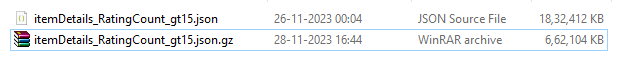